https://realpython.com/python-ai-neural-network/#author

dot product (from scratch)

In [1]:
input_vector = [1.72, 1.23]
weights_1 = [1.26, 0]
weights_2 = [2.17, 0.32]

In [2]:
# computing the dot product of input_vector and weights_1
first_indexes_mult = input_vector[0] * weights_1[0]
second_indexes_mult = input_vector[1] * weights_1[1]
dot_product_1 = first_indexes_mult + second_indexes_mult

In [3]:
print(f'The dot product is: {dot_product_1}')

The dot product is: 2.1672


dot product (from library)

In [4]:
import numpy as np

In [5]:
dot_product_1 = np.dot(input_vector, weights_1)

In [6]:
print(f'the dot product is: {dot_product_1}')

the dot product is: 2.1672


In [7]:
dot_product_2 = np.dot(input_vector, weights_2)

In [8]:
print(f'the dot product is: {dot_product_2}')

the dot product is: 4.1259999999999994


Classification problem with two targets: 0 and 1

if prediction result > 0.5: 1

else: 0

In [9]:
input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0])

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
def make_prediction(input_vector, weights, bias):
    layer_1 = np.dot(input_vector, weights) + bias
    layer_2 = sigmoid(layer_1)
    return layer_2

The target should be 1:

In [13]:
prediction = make_prediction(input_vector, weights_1, bias)

In [14]:
print(f'the prediction result is: {prediction}')

the prediction result is: [0.7985731]


The target should be 0:

In [16]:
input_vector = np.array([2, 1.5])
prediction = make_prediction(input_vector, weights_1, bias)
print(f'the prediction result is: {prediction}')

the prediction result is: [0.87101915]


In [17]:
target = 0
mse = np.square(prediction - 0)
print(f'prediction: {prediction}; error: {mse}')

prediction: [0.87101915]; error: [0.75867436]


In [18]:
derivative = 2*(prediction - target)
print(f'The derivative is {derivative}')

The derivative is [1.7420383]


In [19]:
weights_1 = weights_1 - derivative

In [20]:
prediction = make_prediction(input_vector, weights_1, bias)

In [21]:
error = (prediction - target) ** 2

In [22]:
print(f'prediction: {prediction}, error: {error}')

prediction: [0.01496248], error: [0.00022388]


In [23]:
def sigmoid_deriv(x):
    return sigmoid(x) * (1-sigmoid(x))

In [26]:
derror_dprediction = 2 * (prediction - target)
layer_1 = np.dot(input_vector, weights_1) + bias
dprediction_dlayer1 = sigmoid_deriv(layer_1)
dlayer1_dbias = 1

In [27]:
derror_dbias = (derror_dprediction * dprediction_dlayer1 * dlayer1_dbias)

In [43]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

In [44]:
learning_rate = 0.1
neural_network = NeuralNetwork(learning_rate)
neural_network.predict(input_vector)

0.7853060099686129

In [45]:
import matplotlib.pyplot as plt

In [46]:
input_vectors = np.array(
    [
        [3, 1.5],
        [2, 1],
        [4, 1.5],
        [3, 4],
        [3.5, 0.5],
        [2, 0.5],
        [5.5, 1],
        [1, 1]
    ]
)

In [47]:
targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

In [48]:
learning_rate = 0.1

In [49]:
neural_network = NeuralNetwork(learning_rate)

In [51]:
training_error = neural_network.train(input_vectors, targets, 10000)

Text(0, 0.5, 'error for all training instances')

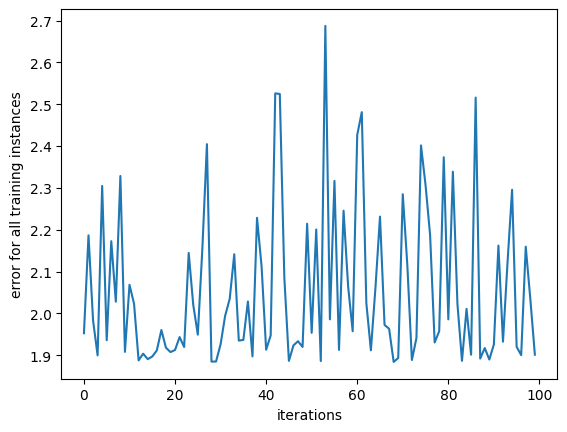

In [52]:
plt.plot(training_error)
plt.xlabel('iterations')
plt.ylabel('error for all training instances')

In [5]:
import keras
from keras.models import Model
from keras.layers import Dense

In [3]:
model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

NameError: name 'layers' is not defined

# Come on

In [1]:
import keras
from keras import layers
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
X = np.random.rand(100, 1)
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential([
    layers.Input(shape=1,),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])